Zillow dataset: https://www.kaggle.com/c/zillow-prize-1/data

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 14})

In [44]:
zillow_dataset = pd.read_csv('properties_2017.csv')

/Users/debjit/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
zillow_dataset.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [46]:
zillow_dataset_cols = ["yearbuilt", "bathroomcnt", "bedroomcnt", "calculatedfinishedsquarefeet",
                       "landtaxvaluedollarcnt", "lotsizesquarefeet", "structuretaxvaluedollarcnt"]
zillow_subset = zillow_dataset[zillow_dataset_cols]

In [47]:
#Dropping rows with NAs
zillow_subset = zillow_subset.dropna(axis = 0, how = 'any')

In [48]:
#Made new columns to get the total value of home, and to get price per sq ft of home and the land
zillow_subset['total_value'] = (zillow_subset.loc[:,('landtaxvaluedollarcnt')] + 
                            zillow_subset.loc[:,('structuretaxvaluedollarcnt')])
zillow_subset['price_per_sqft_house'] = (zillow_subset.loc[:,('structuretaxvaluedollarcnt')] / 
                            zillow_subset.loc[:,('calculatedfinishedsquarefeet')])
zillow_subset['price_per_sqft_land'] = (zillow_subset.loc[:,('landtaxvaluedollarcnt')] / 
                            zillow_subset.loc[:,('lotsizesquarefeet')])

In [49]:
#Dropping rows with zeros
zillow_subset= zillow_subset[(zillow_subset.T != 0).all(axis=0)]

In [51]:
zillow_subset.describe()

,yearbuilt,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,landtaxvaluedollarcnt,lotsizesquarefeet,structuretaxvaluedollarcnt,total_value,price_per_sqft_house,price_per_sqft_land
count,2.651681e+06,2.651681e+06,2.651681e+06,2.651681e+06,2.651681e+06,2.651681e+06,2.651681e+06,2.651681e+06,2.651681e+06,2.651681e+06
mean,1.962453e+03,2.312755e+00,3.281376e+00,1.835366e+03,2.668997e+05,2.233112e+04,1.760490e+05,4.429486e+05,8.999886e+01,3.770934e+01
std,2.294842e+01,1.014603e+00,1.118460e+00,1.114715e+03,4.428310e+05,2.507542e+05,2.312171e+05,6.151523e+05,4.251300e+02,6.098532e+01
min,1.801000e+03,5.000000e-01,1.000000e+00,1.000000e+00,9.000000e+00,1.040000e+02,9.000000e+00,1.800000e+01,2.592166e-03,8.946390e-04
25%,1.950000e+03,2.000000e+00,3.000000e+00,1.238000e+03,7.783200e+04,5.693000e+03,7.846200e+04,1.909830e+05,5.550428e+01,7.406345e+00
50%,1.961000e+03,2.000000e+00,3.000000e+00,1.602000e+03,1.756770e+05,7.000000e+03,1.275000e+05,3.230770e+05,8.173798e+01,2.349107e+01
75%,1.979000e+03,3.000000e+00,4.000000e+00,2.176000e+03,3.283610e+05,9.850000e+03,2.042310e+05,5.178250e+05,1.119392e+02,4.661373e+01
max,2.016000e+03,3.200000e+01,2.500000e+01,9.525760e+05,7.766510e+07,3.710005e+08,6.366244e+07,9.018846e+07,4.177700e+05,4.835972e+03


In [52]:
zillow_subset.head()

,yearbuilt,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,landtaxvaluedollarcnt,lotsizesquarefeet,structuretaxvaluedollarcnt,total_value,price_per_sqft_house,price_per_sqft_land
20,2005.0,2.0,4.0,3633.0,74104.0,9826.0,222321.0,296425.0,61.194880,7.541624
28,1972.0,4.0,5.0,2865.0,559520.0,4990.0,271704.0,831224.0,94.835602,112.128257
30,2004.0,2.0,2.0,1090.0,124671.0,40247.0,232897.0,357568.0,213.666972,3.097647
33,1926.0,2.0,3.0,2077.0,436568.0,6490.0,210192.0,646760.0,101.199807,67.267797
45,1957.0,2.0,4.0,1931.0,99828.0,5420.0,124789.0,224617.0,64.624029,18.418450


In [53]:
zillow_heatmap_subset = zillow_subset[["yearbuilt", "bedroomcnt", "lotsizesquarefeet"]]
zillow_heatmap_subset.head(20)

,yearbuilt,bedroomcnt,lotsizesquarefeet
20,2005.0,4.0,9826.0
28,1972.0,5.0,4990.0
30,2004.0,2.0,40247.0
33,1926.0,3.0,6490.0
45,1957.0,4.0,5420.0
75,1950.0,4.0,12843.0
103,2005.0,3.0,22073.0
110,1950.0,3.0,6021.0
111,1950.0,3.0,4917.0
112,1951.0,3.0,5500.0


In [54]:
grouped_by_yearbuilt_bedroomcnt = zillow_heatmap_subset.groupby(['yearbuilt', 'bedroomcnt']).agg('mean').reset_index()

In [55]:
grouped_by_yearbuilt_bedroomcnt.head()

,yearbuilt,bedroomcnt,lotsizesquarefeet
0,1801.0,3.0,14480.5
1,1801.0,4.0,25351.0
2,1802.0,3.0,4553.0
3,1805.0,6.0,6620.0
4,1806.0,9.0,7501.0


In [56]:
grouped_by_yearbuilt_bedroomcnt_subset = grouped_by_yearbuilt_bedroomcnt[(grouped_by_yearbuilt_bedroomcnt["yearbuilt"] > 1960) & (grouped_by_yearbuilt_bedroomcnt["bedroomcnt"] < 10)] 

In [57]:
grouped_by_yearbuilt_bedroomcnt_pivoted = grouped_by_yearbuilt_bedroomcnt_subset.pivot("yearbuilt", "bedroomcnt", "lotsizesquarefeet")

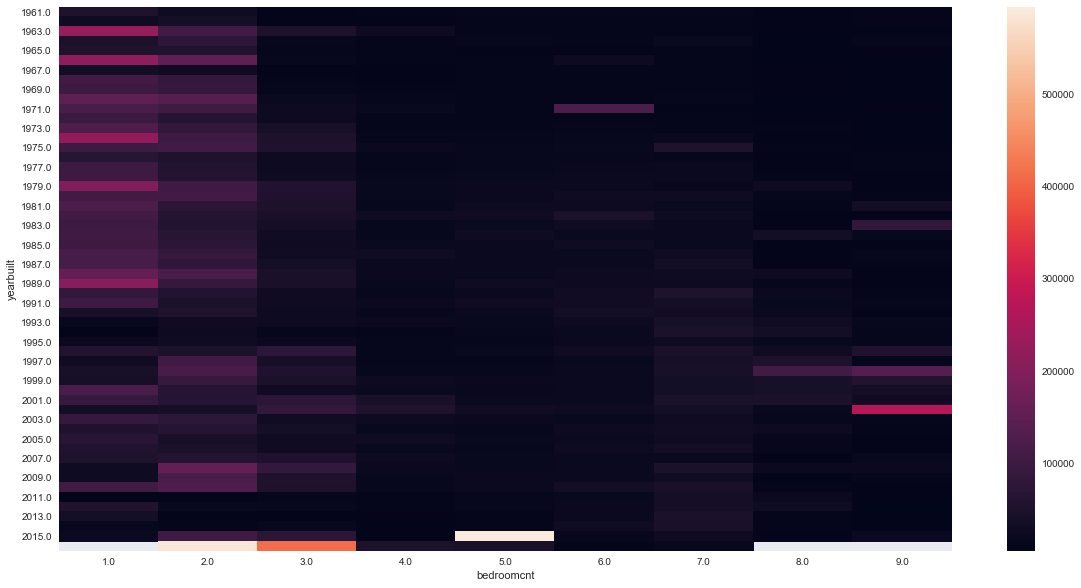

In [58]:
sns.heatmap(grouped_by_yearbuilt_bedroomcnt_pivoted)